# matplotlib 

The most common python plotting library is matplotlib. Matplotlib provides an advanced
object-oriented interface and a Matlab-like interface called **pyplot**

You can see some examples of it in action at
https://matplotlib.org/gallery.html

# matplotlib inline

Matplotlib can interact with Jupyter in two different ways; "inline" and "notebook".  "Inline" mode writes static images directly into the output cell.
"notebook" mode creates an interactive output that the user can resize and zoom.

Changing between the two modes is problematic and therefore discouraged.  Best practice is to declare one at the beginning of your notebook using the appropriate line magic.  For example,

``` python
%matplotlib inline
import matplotlib.pyplot as plt
```


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Simple Example

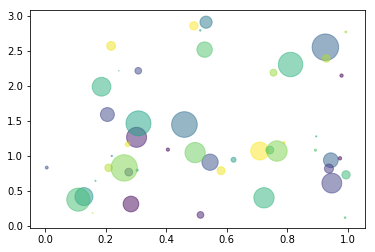

In [2]:
# generate some data
N = 50
xp = np.random.rand(N)
yp = 3*np.random.rand(N)
colors = np.random.rand(N)
radii = 15 * np.random.rand(N)
area = np.pi * radii**2  # 0 to 15 point radiuses

# plot the data
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)

# call show
plt.show()

## Setting The Aspect Ratio

You can easily fix the aspect ratio for the default plot.

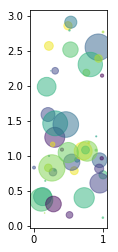

In [3]:
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)
plt.axes().set_aspect('equal')
plt.show()

## Controlling the Plot Size

Depending on your monitor, the plot may be hard to see.  You can specify a plot size in inches, and a DPI (dots-per-inch).

First, lets take a look at the defaults:

In [4]:
from __future__ import print_function
fig = plt.gcf();
dpi = fig.get_dpi();
size = fig.get_size_inches();
print("Default Size: %s.   Default DPI: %s" % (size, dpi))

Default Size: [ 6.  4.].   Default DPI: 72.0


Now, to make the image larger on the screen, we can either increase the DPI or the size.

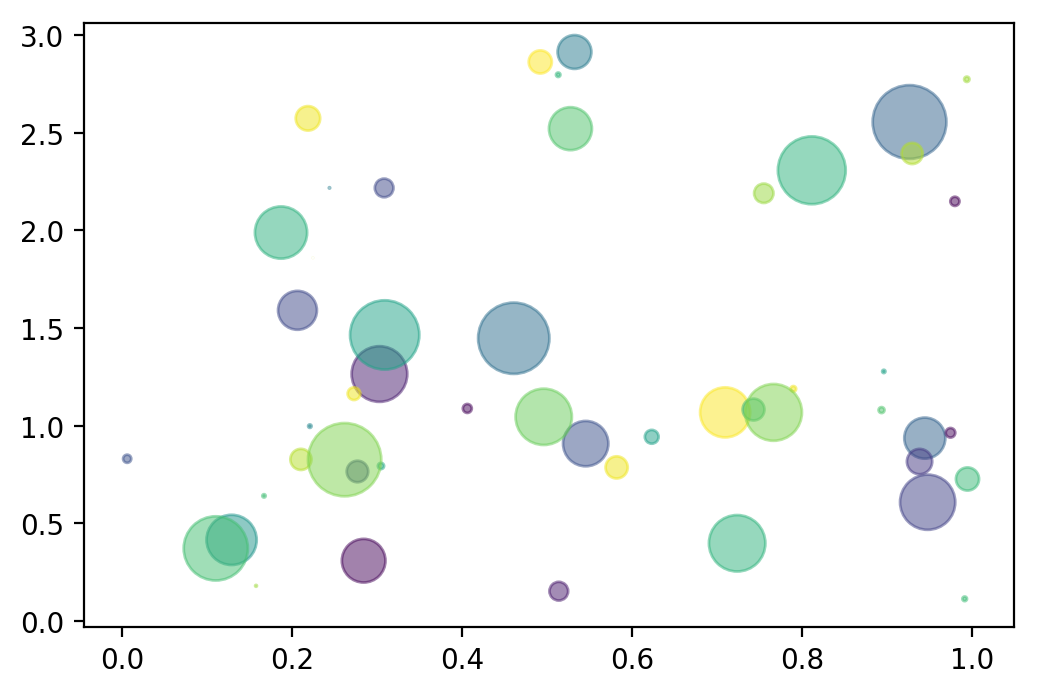

In [5]:
plt.figure(dpi=200)
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)
plt.show()

You can set both the size and DPI at once.  Notice that setting the size also sets the aspect ratio.

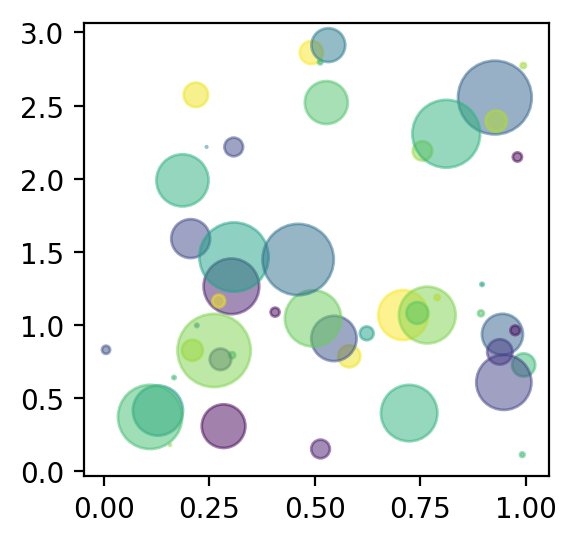

In [6]:
plt.figure(figsize=(3,3), dpi=200)
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)
plt.show()

You can still adjust the aspect ratio later.

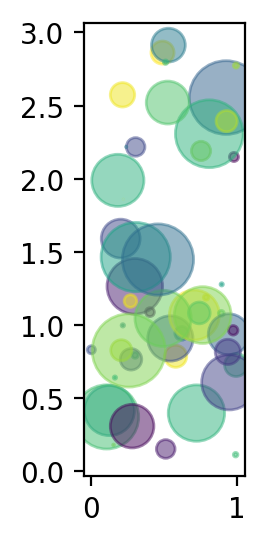

In [7]:
plt.figure(figsize=(3,3), dpi=200)
plt.axes().set_aspect('equal')
plt.scatter(xp, yp, s=area, c=colors, alpha=0.5)
plt.show()

## Resizing Static Plots

The plots you create using "inline" are static and are stored in the output and will be saved with the notebook.  However, output is resized when possible as the browser window is resized.  Give it a try...

## Interactive Use

In [8]:
from ipywidgets import interact

x = np.linspace(0,10,200)

def plot_sine(A, B):
    y = np.sin(A*x+B)
    plt.plot(x,y,linewidth=2)
    plt.show()

interact(plot_sine, A=(1, 10), B=(0,10));

A Jupyter Widget

## Animation

Animation using matplotlib requires use of matplotlib.animation.  You should check the examples in the matplotlib docs.

We recommend using JSAnimation to view animations in the notebook.


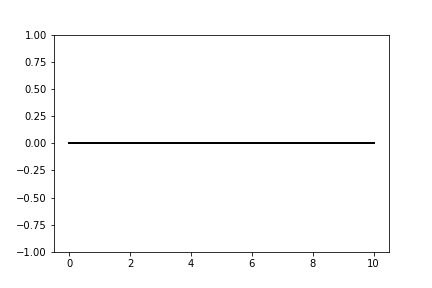
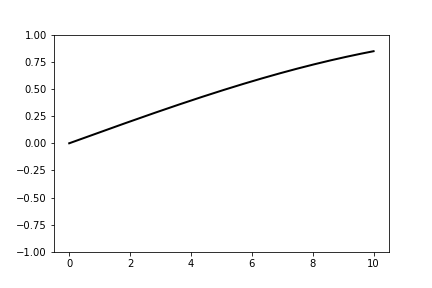
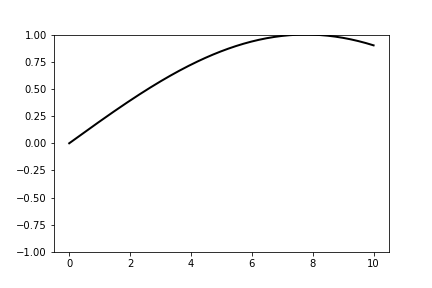
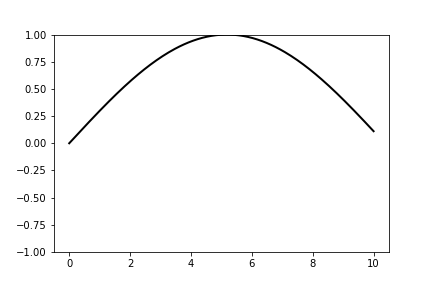
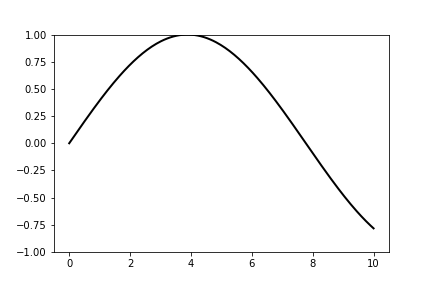
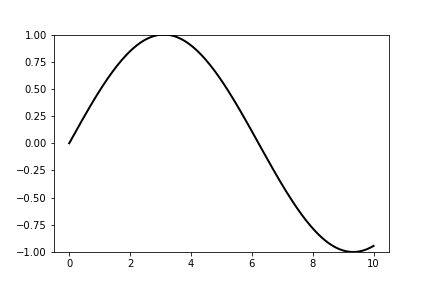
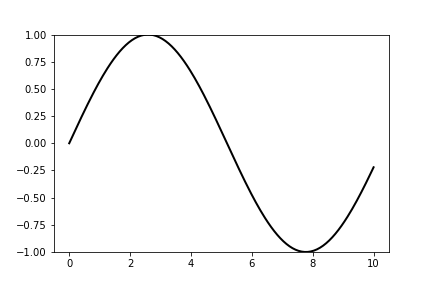
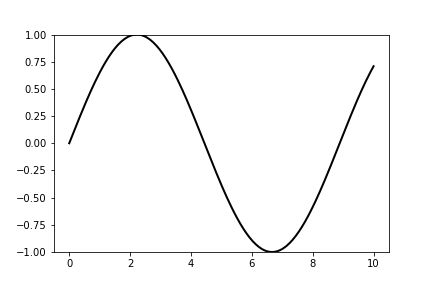
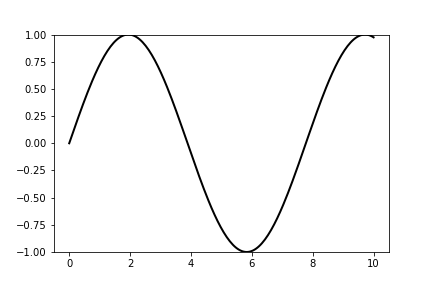
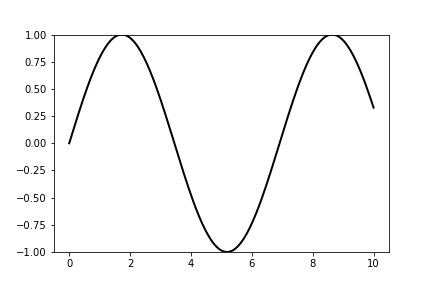
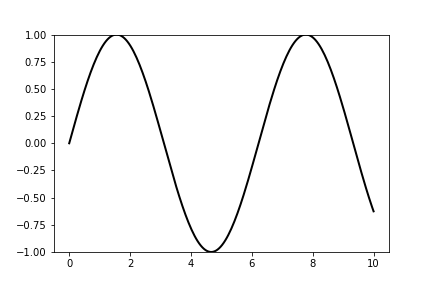
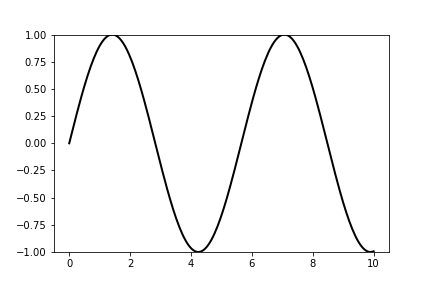
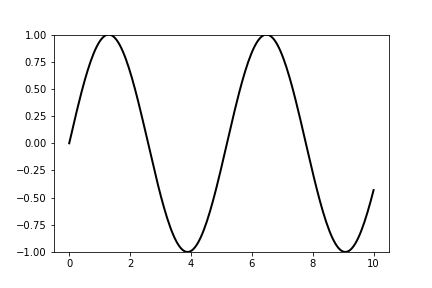
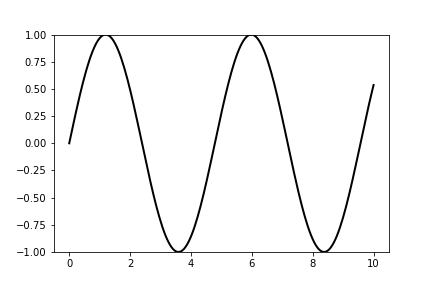
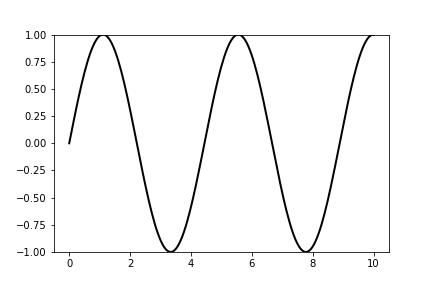
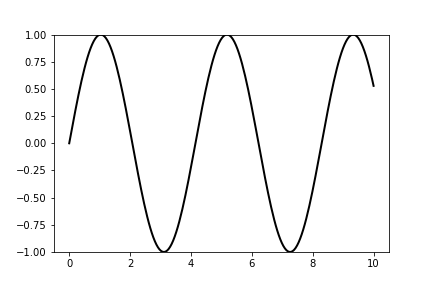
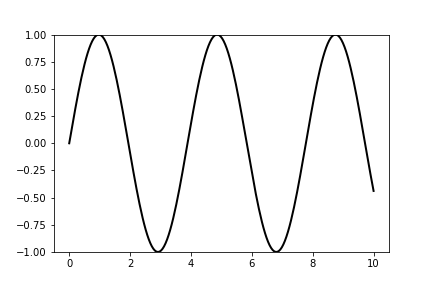
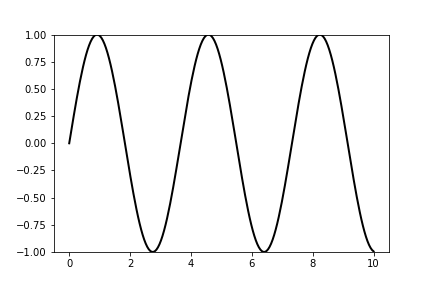
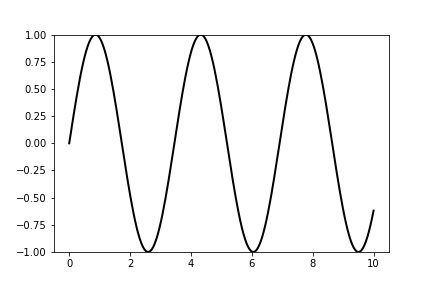
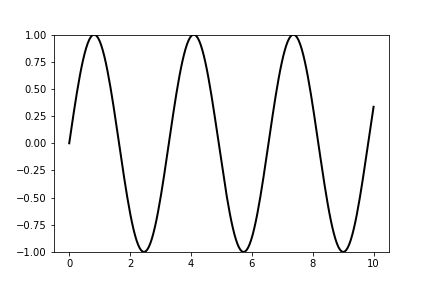
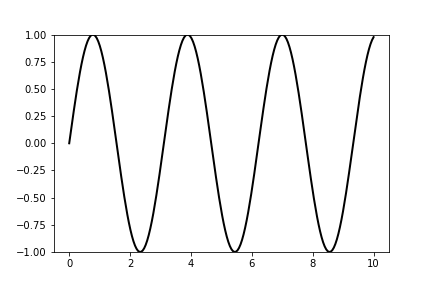
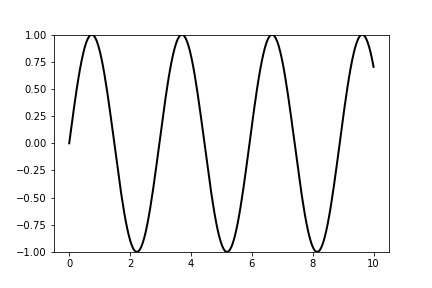
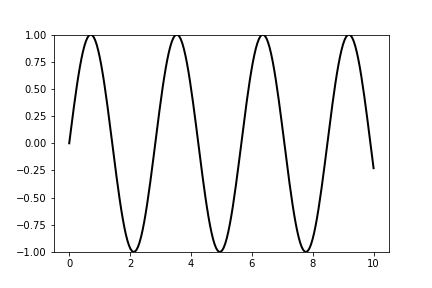
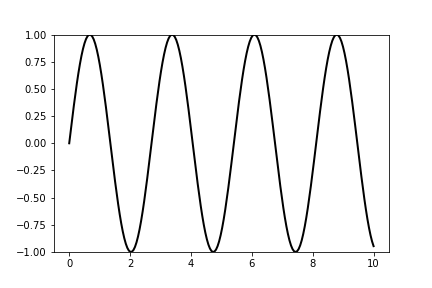
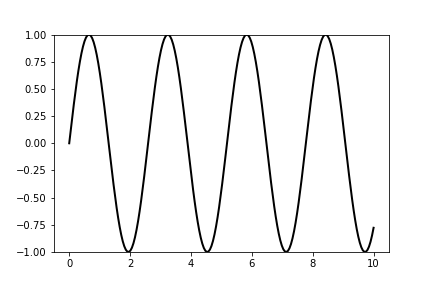
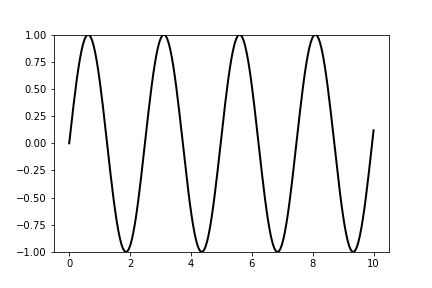
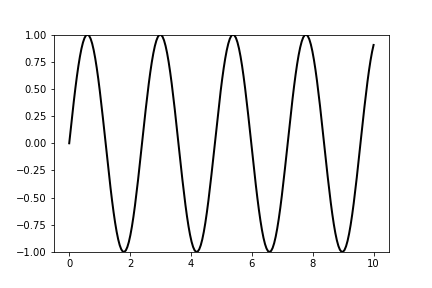
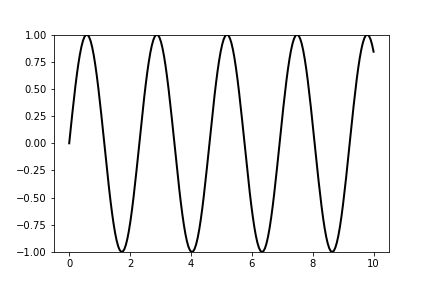
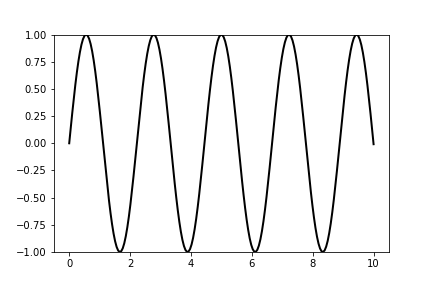
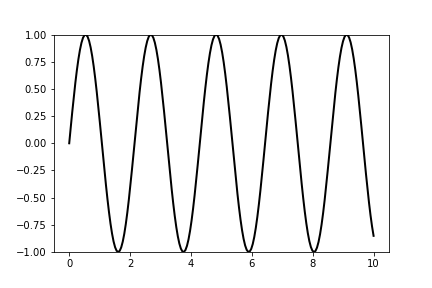
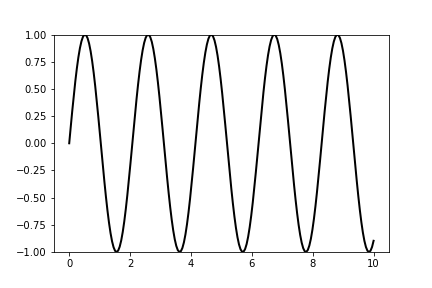
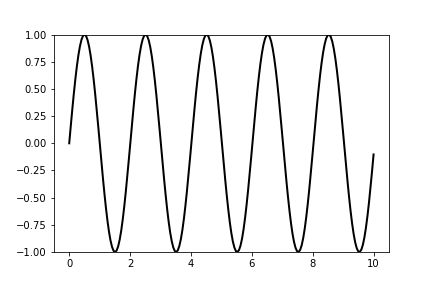
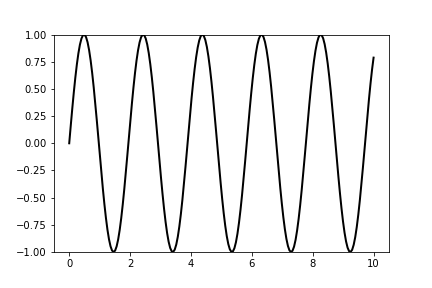
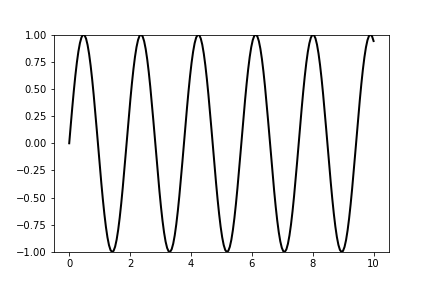
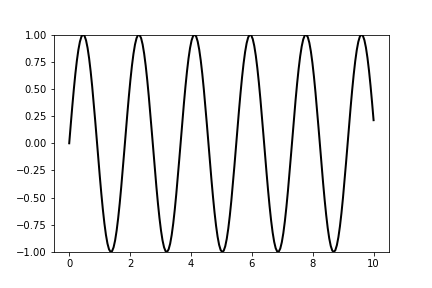
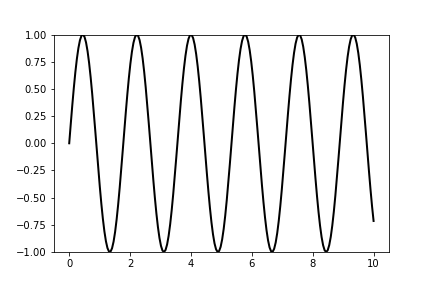
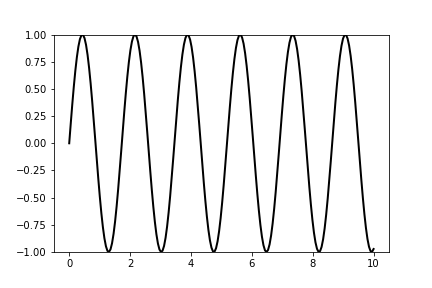
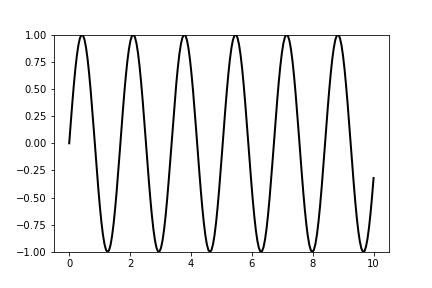
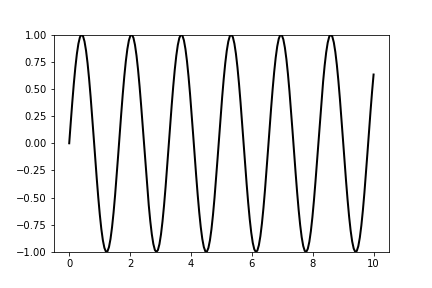
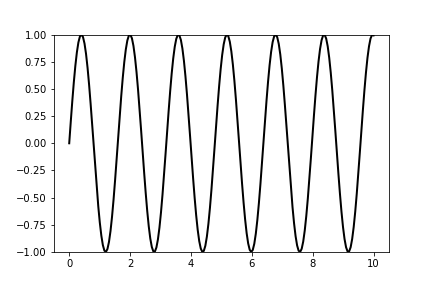
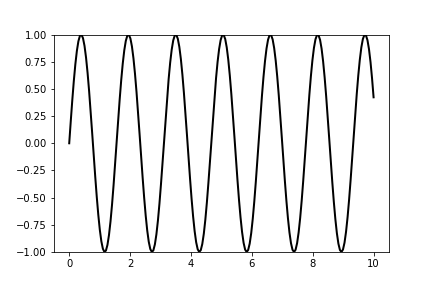
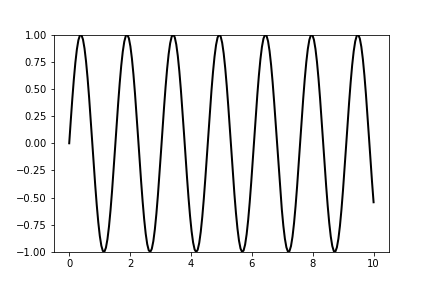
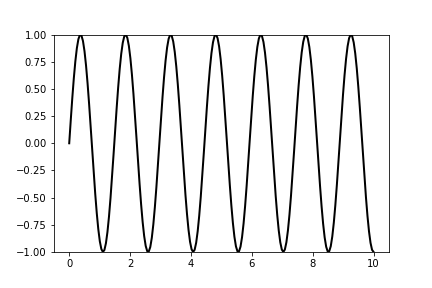
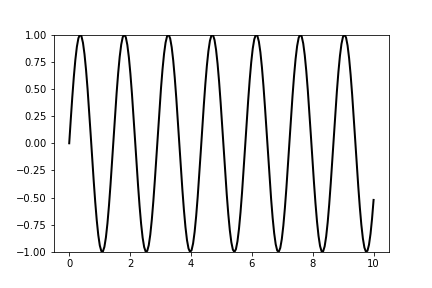
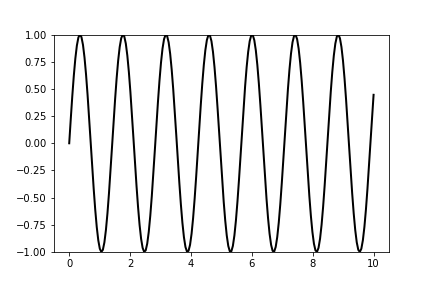
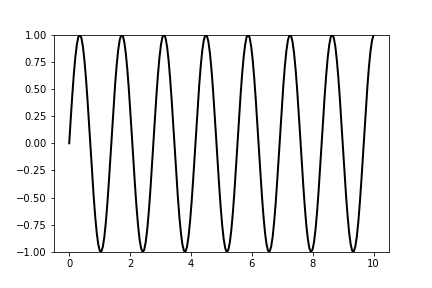
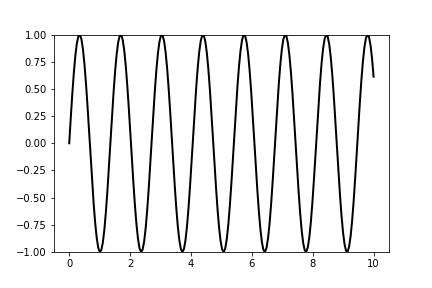
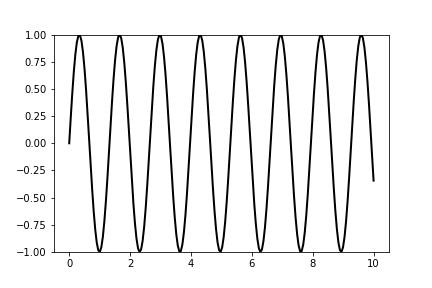
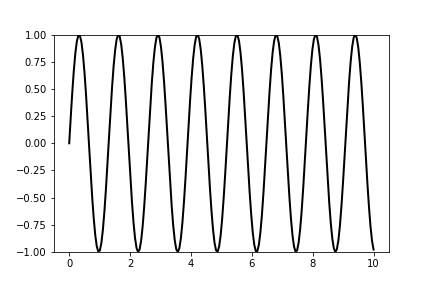
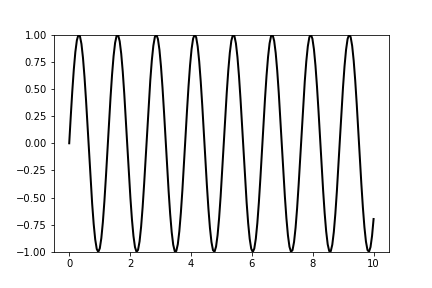
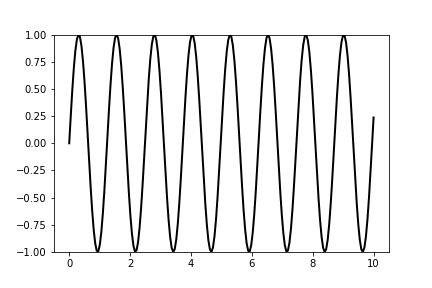
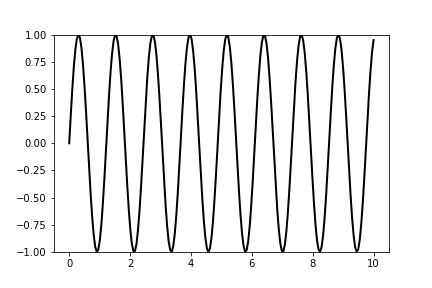
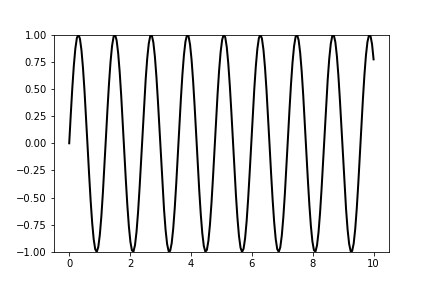
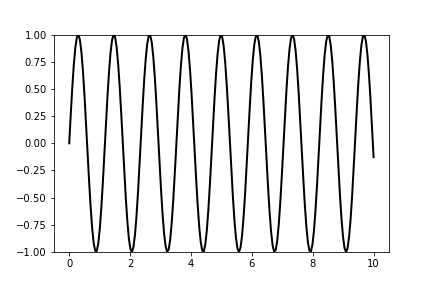
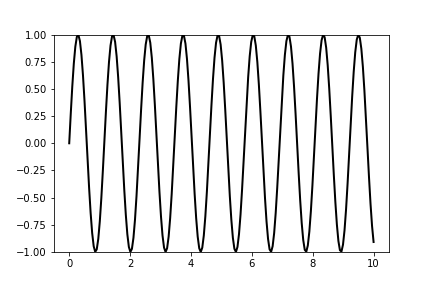
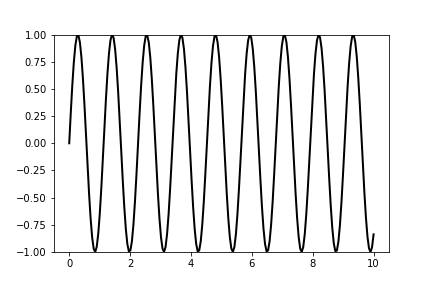
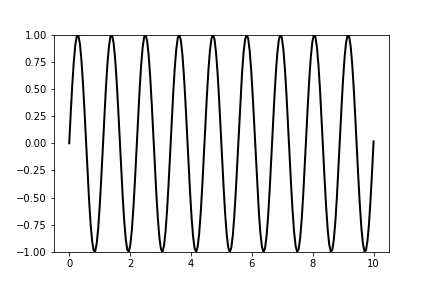
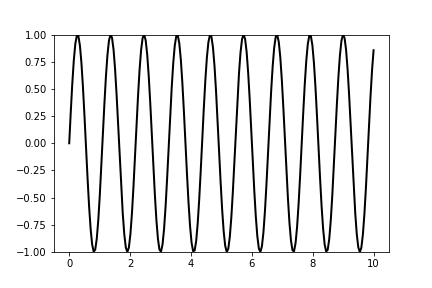
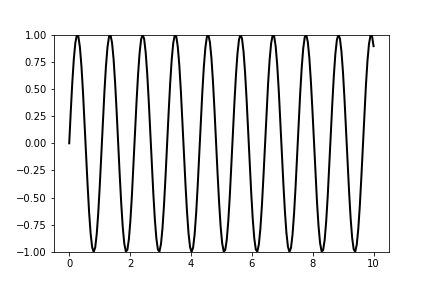
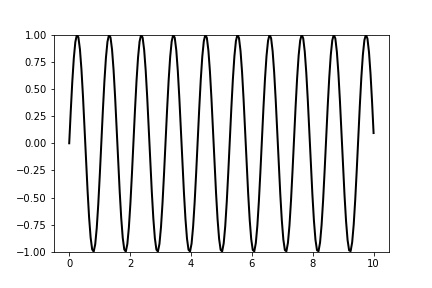
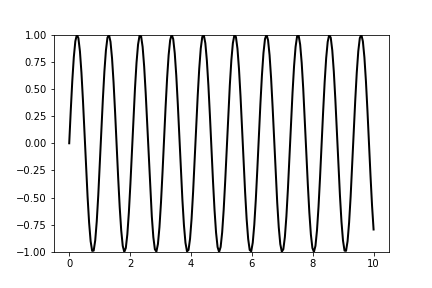
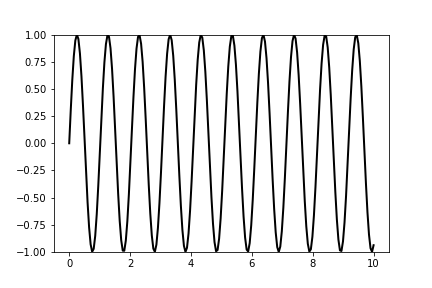
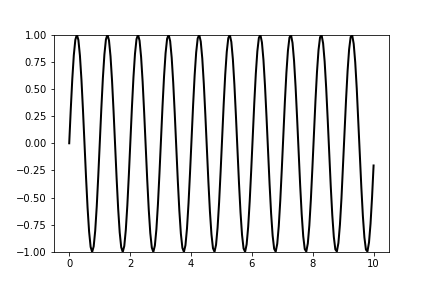
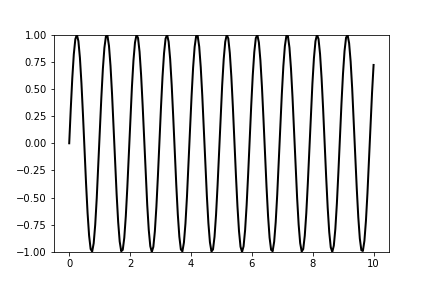
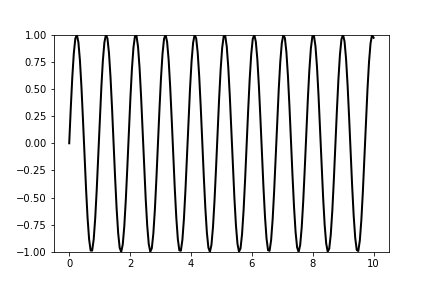
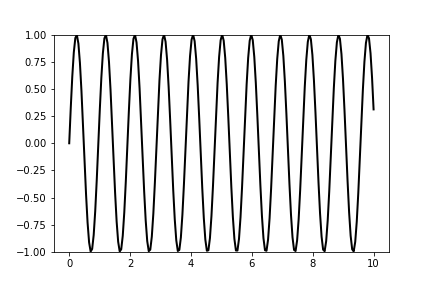
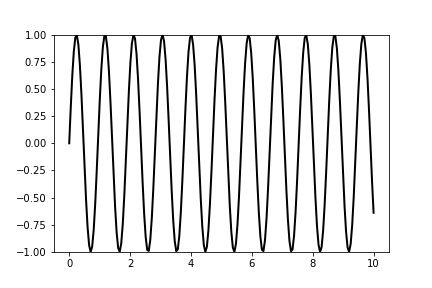
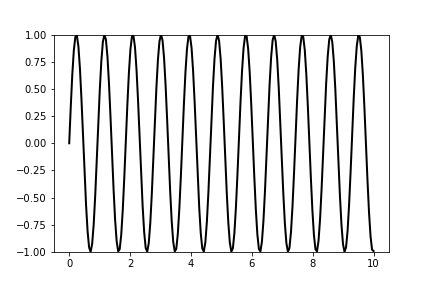
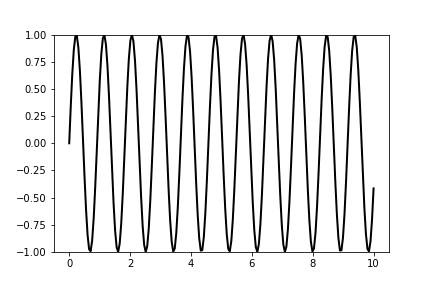
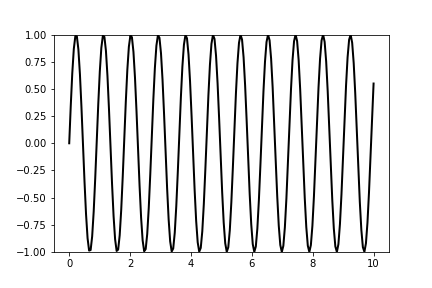
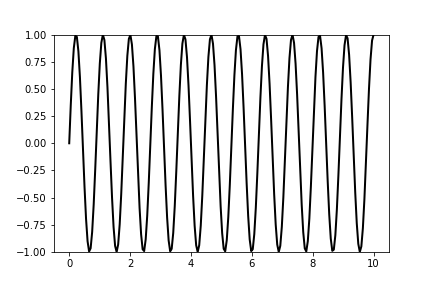
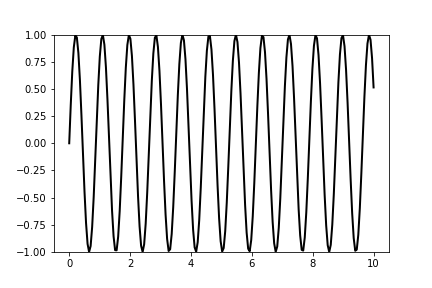
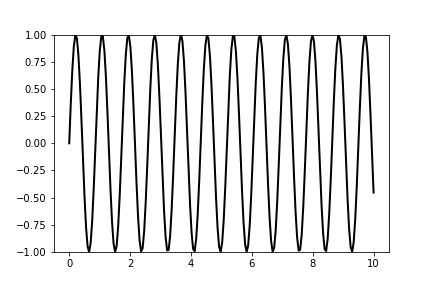
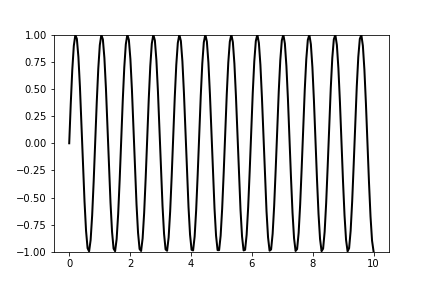
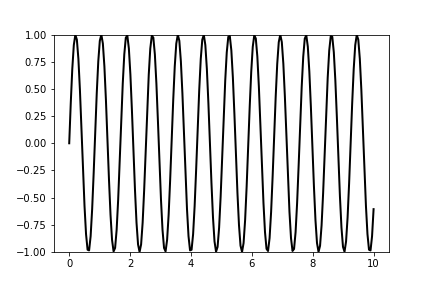
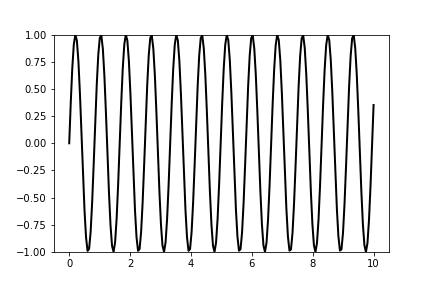
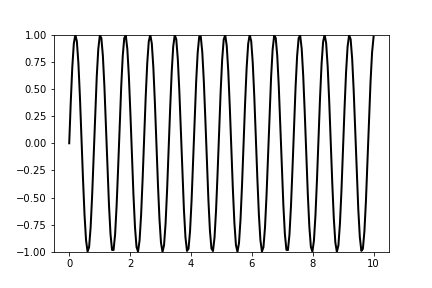
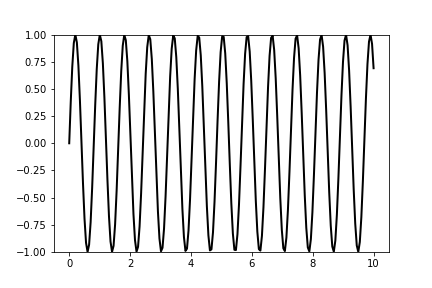
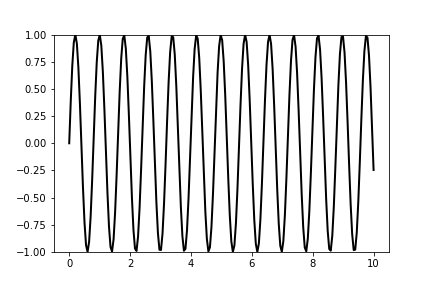
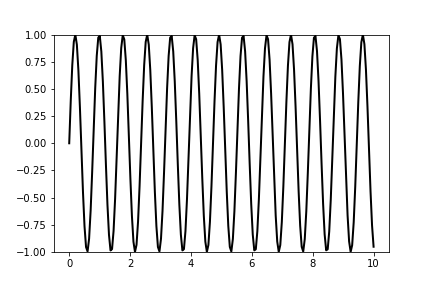
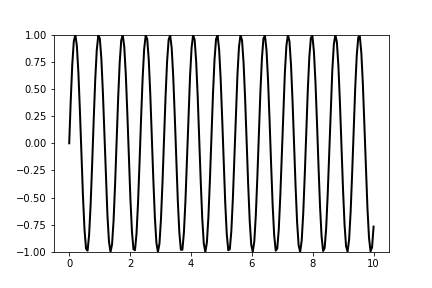
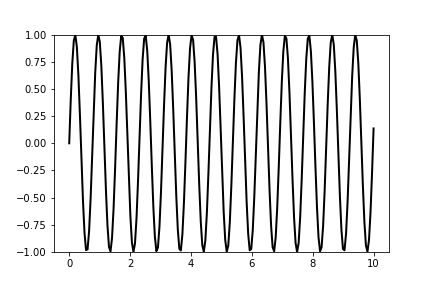
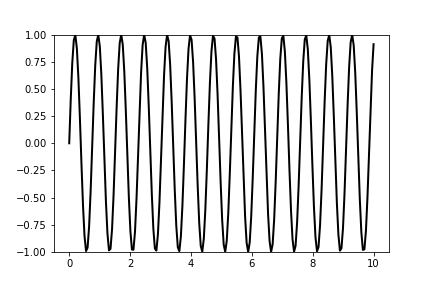
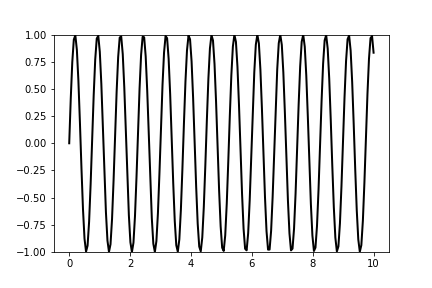
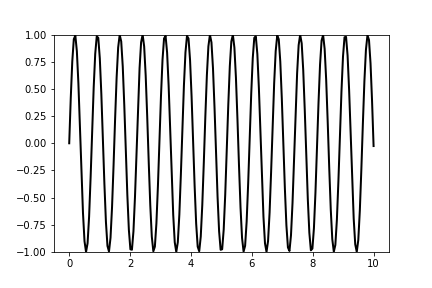
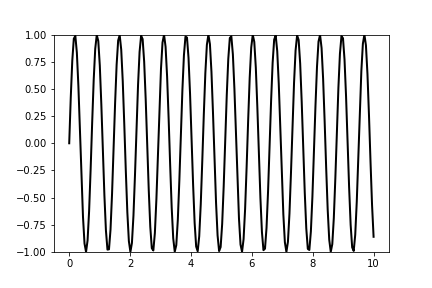
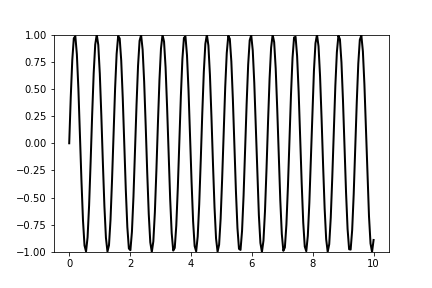
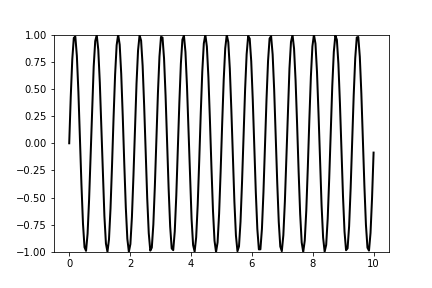
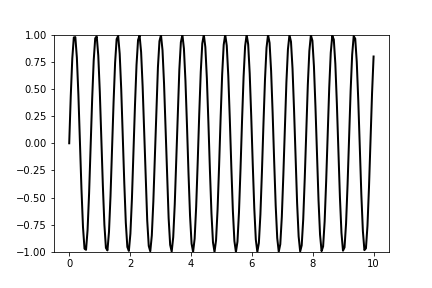
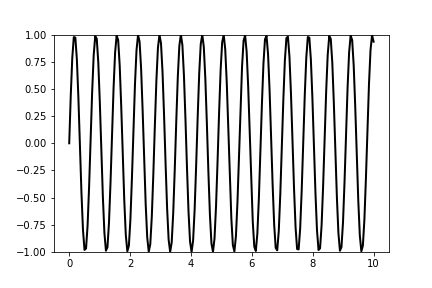
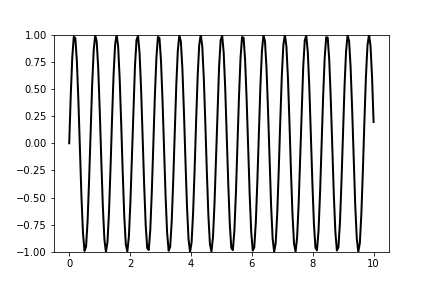
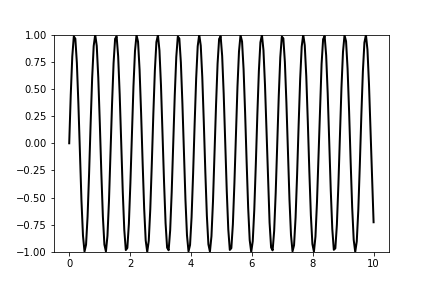
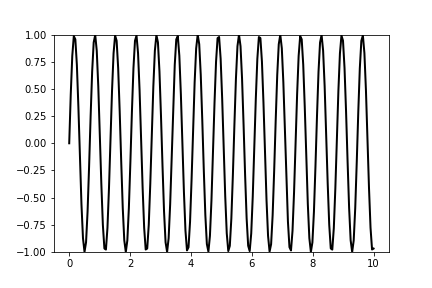
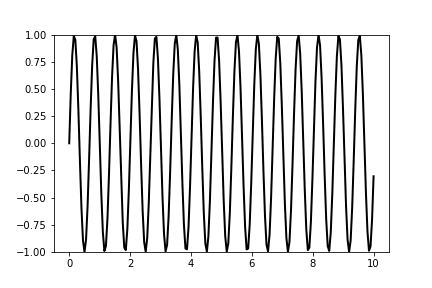
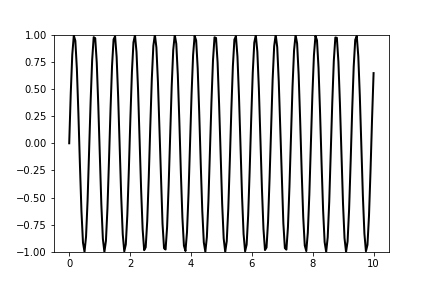
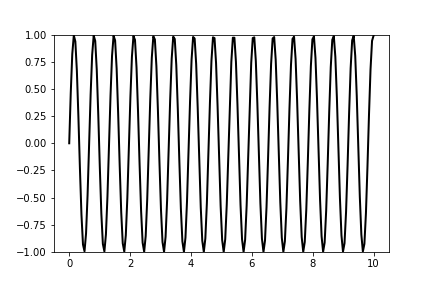
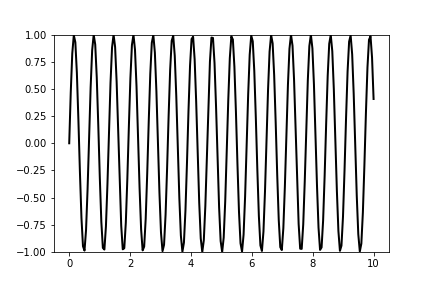
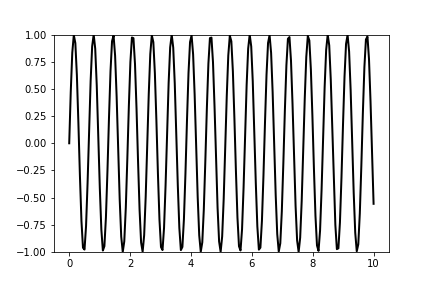
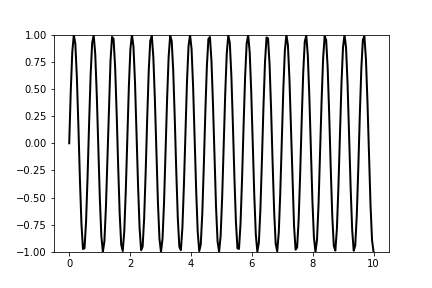
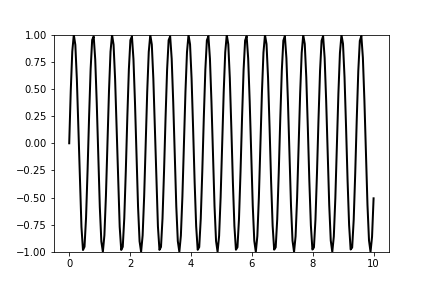

In [9]:
from JSAnimation import IPython_display
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
sline, = ax.plot(x, np.sin(0*x), 'k-', linewidth=2)
ax.set_ylim(-1, 1)

def myf(i):
    y = np.sin(i*x)
    sline.set_ydata(y)
    return sline,

anim = FuncAnimation(fig, myf, frames=np.linspace(0,10,100), interval=100, blit=True)
anim